## K-Means Clustering Animation

✔ Centroid movement

✔ Cluster assignments update

✔ Beautiful + intuitive animation

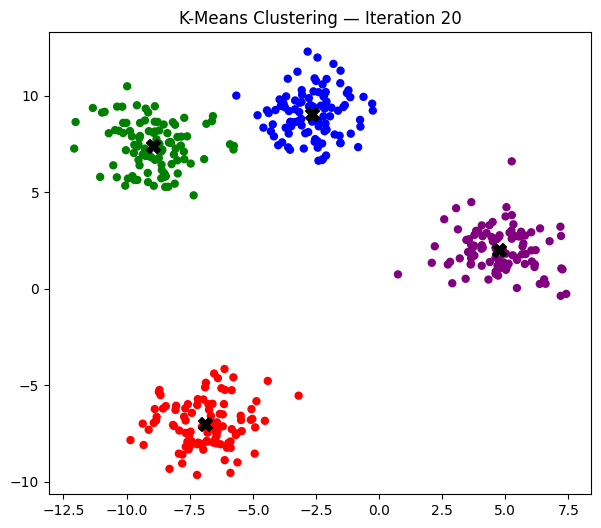

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_blobs

# Create folder
os.makedirs("gifs", exist_ok=True)

# Generate clustered data
X, _ = make_blobs(
    n_samples=400, 
    centers=4, 
    cluster_std=1.2, 
    random_state=42
)

# --- K-MEANS FROM SCRATCH ---
def assign_clusters(X, centroids):
    # Euclidean distance to all centroids
    distances = np.linalg.norm(X[:, None] - centroids[None, :], axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

# Number of clusters
k = 4

# Initialize centroids randomly
np.random.seed(42)
centroids = X[np.random.choice(len(X), k, replace=False)]
centroid_history = []
label_history = []

# Run K-Means for fixed number of iterations (for animation)
iterations = 20
for _ in range(iterations):
    labels = assign_clusters(X, centroids)
    centroid_history.append(centroids.copy())
    label_history.append(labels.copy())
    centroids = update_centroids(X, labels, k)

# --- ANIMATION ---
fig, ax = plt.subplots(figsize=(7, 6))
scatter = ax.scatter([], [], s=25)
centroid_plot = ax.scatter([], [], c='black', s=100, marker='X')

colors = ['red', 'blue', 'green', 'purple']

def update(i):
    # Set point colors by cluster label
    scatter.set_offsets(X)
    scatter.set_color([colors[l] for l in label_history[i]])

    # Update centroid positions
    centroid_plot.set_offsets(centroid_history[i])

    ax.set_title(f"K-Means Clustering — Iteration {i+1}")
    ax.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
    ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

    return scatter, centroid_plot

ani = FuncAnimation(fig, update, frames=iterations, interval=400)

# Save GIF
ani.save("gifs/kmeans_clustering.gif", writer="pillow")

plt.show()
